<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/PPCienciaDatos/Clases/11SepKPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA

In [ ]:
from scipy.linalg import eigh
from sklearn.gaussian_process.kernels import squareform
from scipy.spatial.distance import pdist

def rbf_kpca(X, gamma, n_components):
  """ RBF KernelPCA
  Params
  ---------
  X: {Numpy ndarray}, shape = [n_samples, n_features]
    Conjunto de muestras
  gamma: float
    Parámetro de aujste (tunning) del kernel RBF
  n_components: int (k)
    Número de componentes principales a devolver
  Returns
  ---------
    alphas: {Numpy ndarray}, shape = [n_samples, k_features]
      Conjunto de datos proyectado
    lambdas: {Numpy ndarray}, shape = [n_samples]
      Eigenvalores correspondientes
  """

  # Calcula las distancias cuadráticas de todas las parejas de muestras
  sq_dists = pdist(X,'sqeuclidean')
  # Convertir a una matriz cuadrada
  mat_sq_dists = squareform(sq_dists)
  # Obtener la matriz de núcleos
  K = np.exp(-gamma * mat_sq_dists)
  # Centrar la matriz
  n = K.shape[0]
  one_n = np.ones((n,n))/n
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  # Obtener los eigenpares
  eigenvals, eigenvecs = eigh(K) # los devuelve ordenados por eigenvals
  # Invertir los arreglos
  eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1]
  # Seleccionar los k primeros eigenvecs correspondientes a los mayores eigenvals
  alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
  # Y los eigenvals
  lambdas = np.column_stack([eigenvals[i] for i in range(n_components)])
  return alphas, lambdas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Medias Lunas

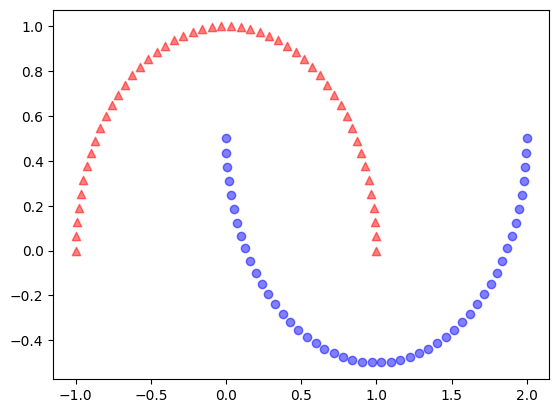

In [ ]:
# funciona como PCA, no requiere etiquetas
# Datos: medias lunas
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],marker='^',color='red',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],marker='o',color='blue',alpha=0.5)
# la matriz de nucleos va a ser de 100x100

### Con PCA

In [ ]:
# Con PCA
#no es necesario estandarizar porque el rango esta entre x(1,2) y y(0,1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

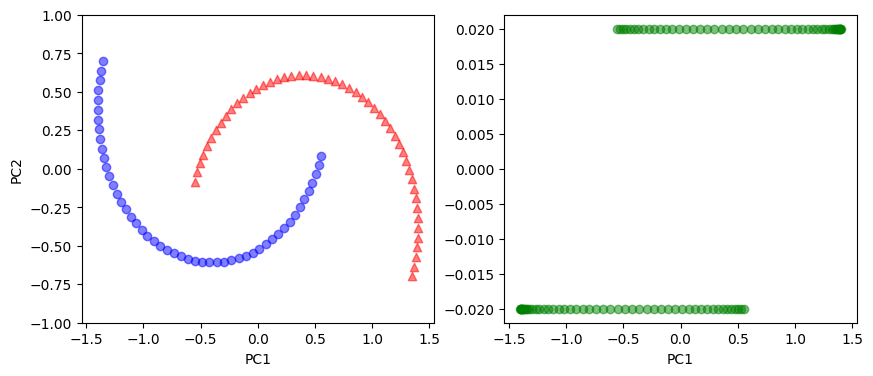

In [ ]:
# lo que hace es aplanar las curvas
# por lo que no nos muestra información separada de nuestros conjuntos
# no funcionó para separar
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_pca[y==0,0],np.zeros((50,1))+0.02,marker='o',color='green',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='green',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[0].set_ylim(-1,1)
plt.show()

### Con KPCA función creada

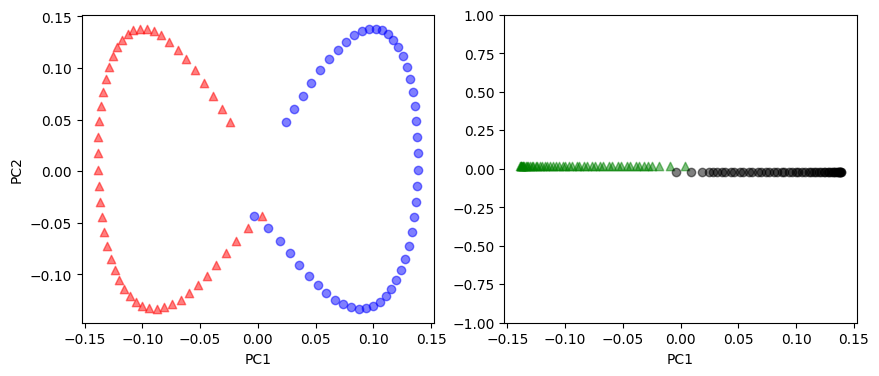

In [ ]:
# Con rbf_kpca
# Si los separa y vemos los componentes del conjunto
# Recurrimos a kpca para hacer el conjunto separable
# Llevamos 2 dim a dim de 100x100 y luego tomamos otra vez las 2 principales
X_kpca, l = rbf_kpca(X, gamma=10, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,marker='^',color='green',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='black',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

Cambiar el valor de gamma es un ajuste de hiperparámetro

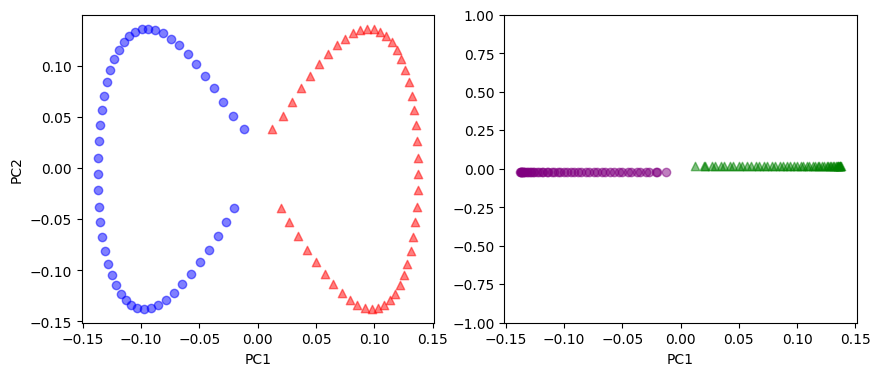

In [ ]:
X_kpca, l = rbf_kpca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,marker='^',color='green',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='purple',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

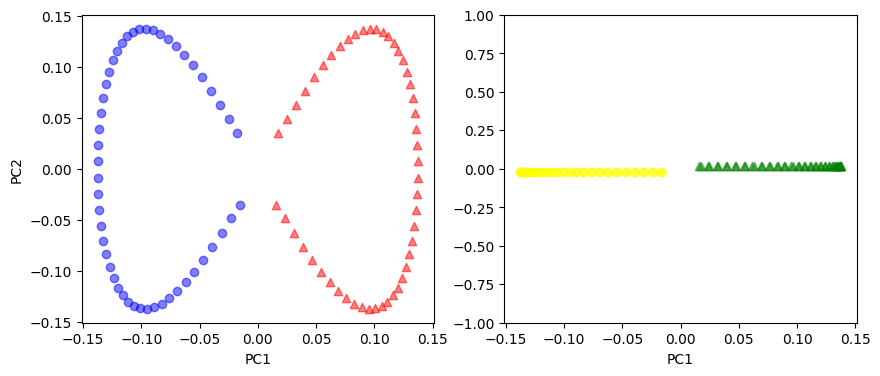

In [ ]:
X_kpca, l = rbf_kpca(X, gamma=20, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,marker='^',color='green',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='yellow',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()

### Con KernelPCA de Sklearn

In [ ]:
#KernelPCA de sklearn
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

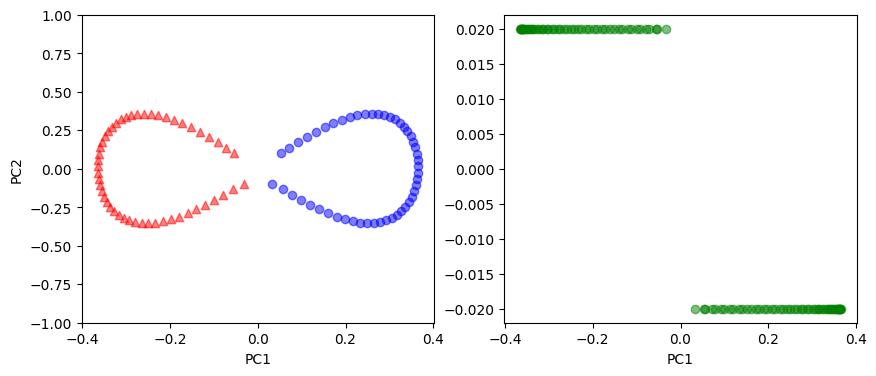

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,marker='o',color='green',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='green',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[0].set_ylim(-1,1)
plt.show()

## Círculos Concentricos

<function matplotlib.pyplot.show(close=None, block=None)>

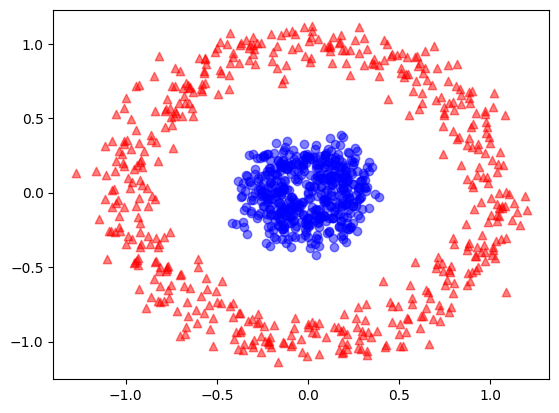

In [ ]:
# Circulos concentricos
# este conjunto tampoco es linealmente separable
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],marker='^',color='red',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],marker='o',color='blue',alpha=0.5)
plt.show

### Probando con PCA, KPCA y rbf

Tarea: hacer make_circles con cada una

### Con PCA de sklearn

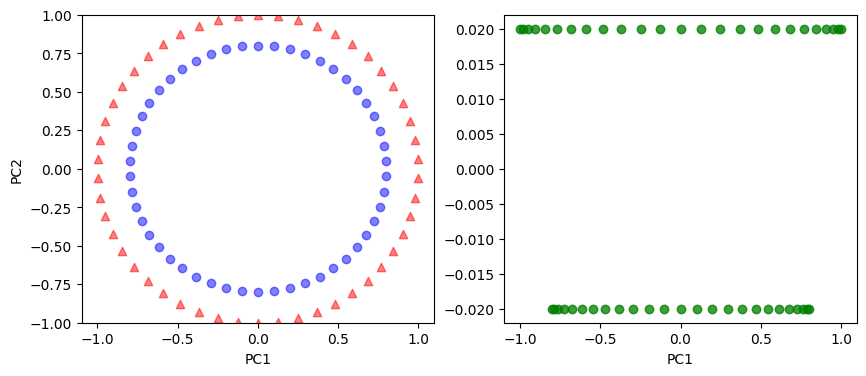

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_pca[y==0,0],np.zeros((50,1))+0.02,marker='o',color='green',alpha=0.5)
ax[1].scatter(X_pca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='green',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[0].set_ylim(-1,1)
plt.show()

Con KPCA de Sklearn

In [ ]:
X,y = make_circles(n_samples=100, random_state=123)
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

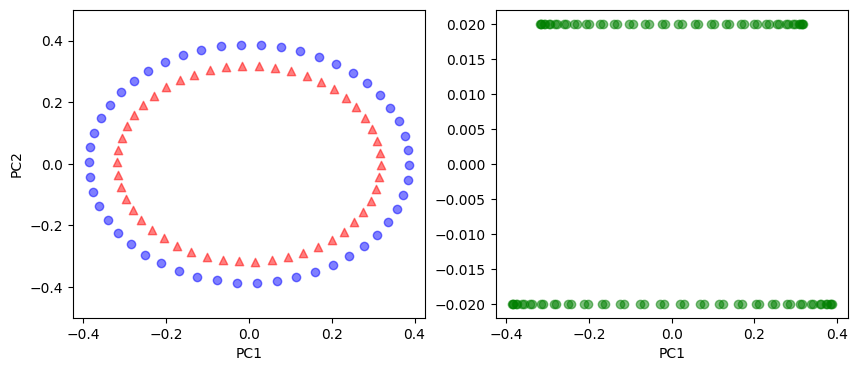

In [ ]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,marker='o',color='green',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='green',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[0].set_ylim(-0.5,0.5)
plt.show()

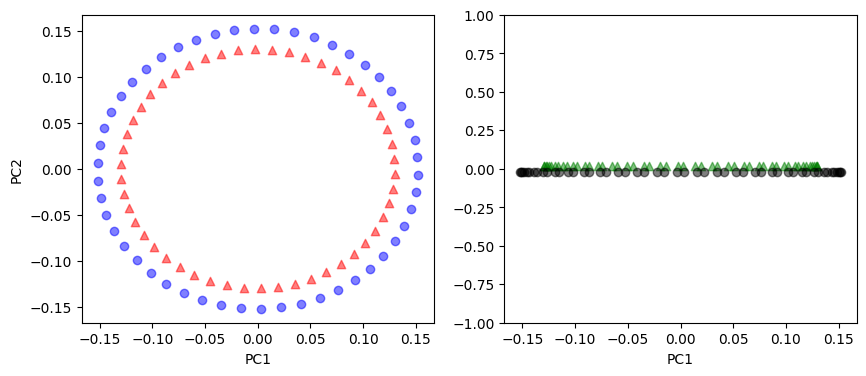

In [ ]:
X_kpca, l = rbf_kpca(X, gamma=10, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],marker='^',color='red',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],marker='o',color='blue',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,marker='^',color='green',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))-0.02,marker='o',color='black',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
ax[1].set_ylim([-1,1])
plt.show()